In [19]:
import torch 
import torch.nn as nn
import torch.optim as optim 
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import Compose
from torchsummary import summary


### 1. Fashion - MNIST/Cifar10 Using only Conv2d

In [6]:
transform = Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

In [9]:
trainset = datasets.FashionMNIST(
    root = '/home/nhatthuong/Documents/ResearchVQA-VQG-firstpaper/AIO/MultilayerPerceptron/data',
    train=True,
    download= True, 
    transform=transform)
testset = datasets.FashionMNIST(
    root = '/home/nhatthuong/Documents/ResearchVQA-VQG-firstpaper/AIO/MultilayerPerceptron/data',
    train = False,
    download=True,
    transform=transform
)

In [12]:
trainloader = DataLoader(
    trainset, batch_size=1024, num_workers=2, shuffle= True, drop_last= True
)
testloader = DataLoader(
    testset, batch_size=1024, shuffle=True, num_workers=True, drop_last=True
)

In [ ]:
for i, (value, labels) in enumerate(trainloader):
    print(f"batch {i+1} -- value {value.shape} -- labels {labels.shape}")

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [52]:
 #(1,28,28)
model = nn.Sequential(
    nn.Conv2d(1,32,7),
    nn.MaxPool2d(2),
    nn.Conv2d(32,64,7),
    nn.MaxPool2d(2),

    # nn.Conv2d(64,128,7),
    # nn.Conv2d(128,256,7),
    # nn.Flatten(),
    # nn.Linear(4096, 128),
    # nn.Linear(128, 10)
)
model.to(device)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(7, 7), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [53]:
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 22, 22]           1,600
         MaxPool2d-2           [-1, 32, 11, 11]               0
            Conv2d-3             [-1, 64, 5, 5]         100,416
         MaxPool2d-4             [-1, 64, 2, 2]               0
Total params: 102,016
Trainable params: 102,016
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.16
Params size (MB): 0.39
Estimated Total Size (MB): 0.55
----------------------------------------------------------------


In [54]:
data = torch.randn((32,1,28,28))
data = data.to(device)

In [55]:
output = model(data)
print(output.shape)

torch.Size([32, 64, 2, 2])


In [48]:
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.conv1 = nn.Conv2d(1,32, kernel_size=7)
        self.conv2 = nn.Conv2d(32,64, kernel_size=7)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=7)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=7)
        self.flatten = nn.Flatten()
        self.dense1 = nn.Linear(256*8*8, 128)
        self.dense2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.maxpooling = nn.MaxPool2d(2)
    def backward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv2(x))
        x = self.maxpooling(x)
        x = self.relu(self.conv2(x))
        x = self.flatten(x)
        x = self.relu(self.dense1(x))
        x = self.dense2(x)
        return x

In [49]:
model = CustomModel()
model = model.to(device)

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

### 2. Pooling

#### 2.1 Max Pooling

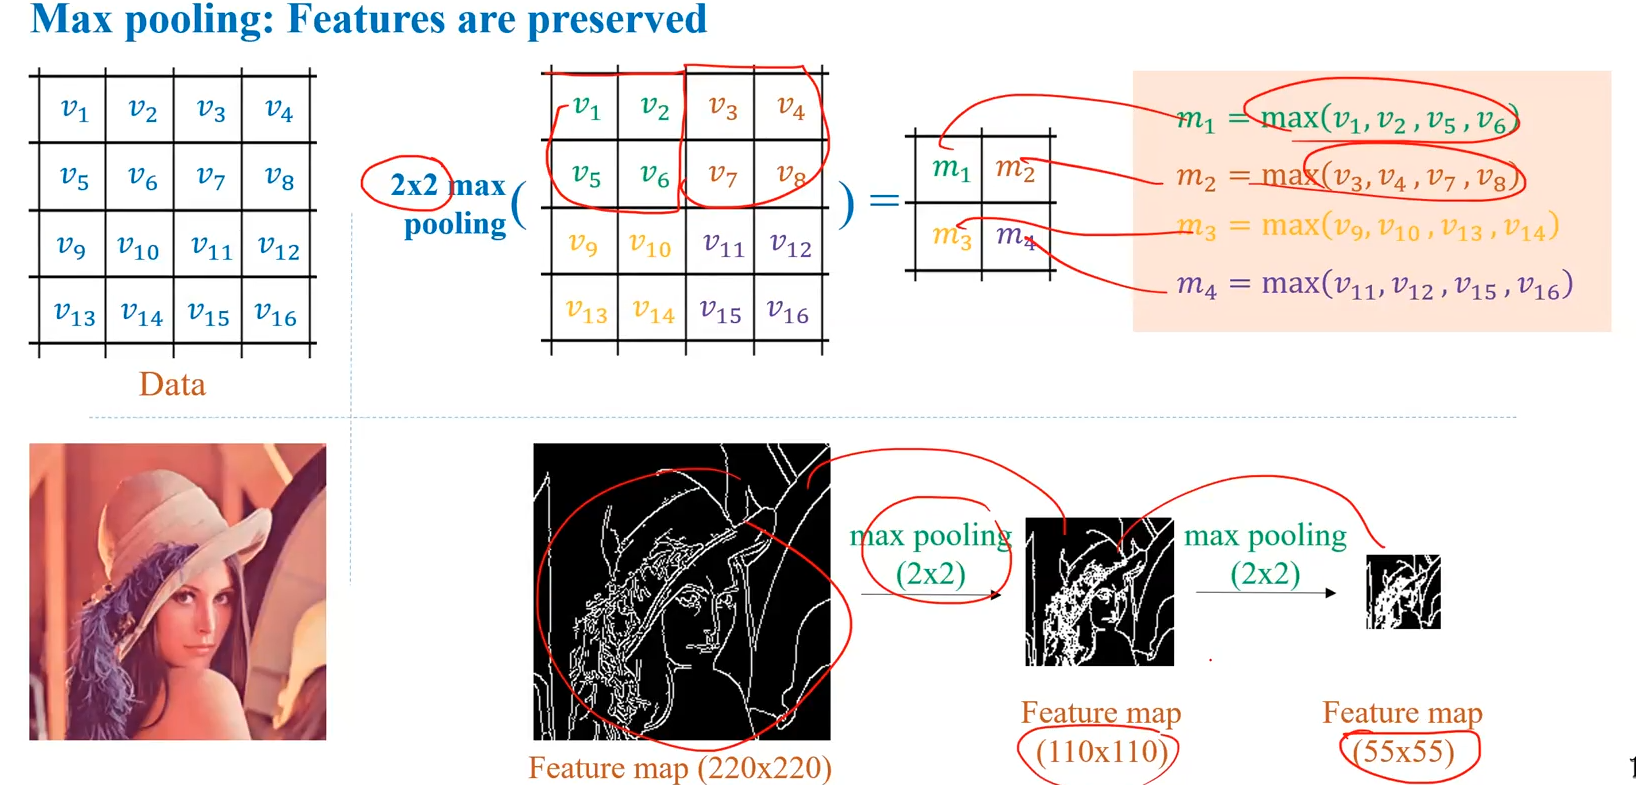

#### 2.2 Average Pooling

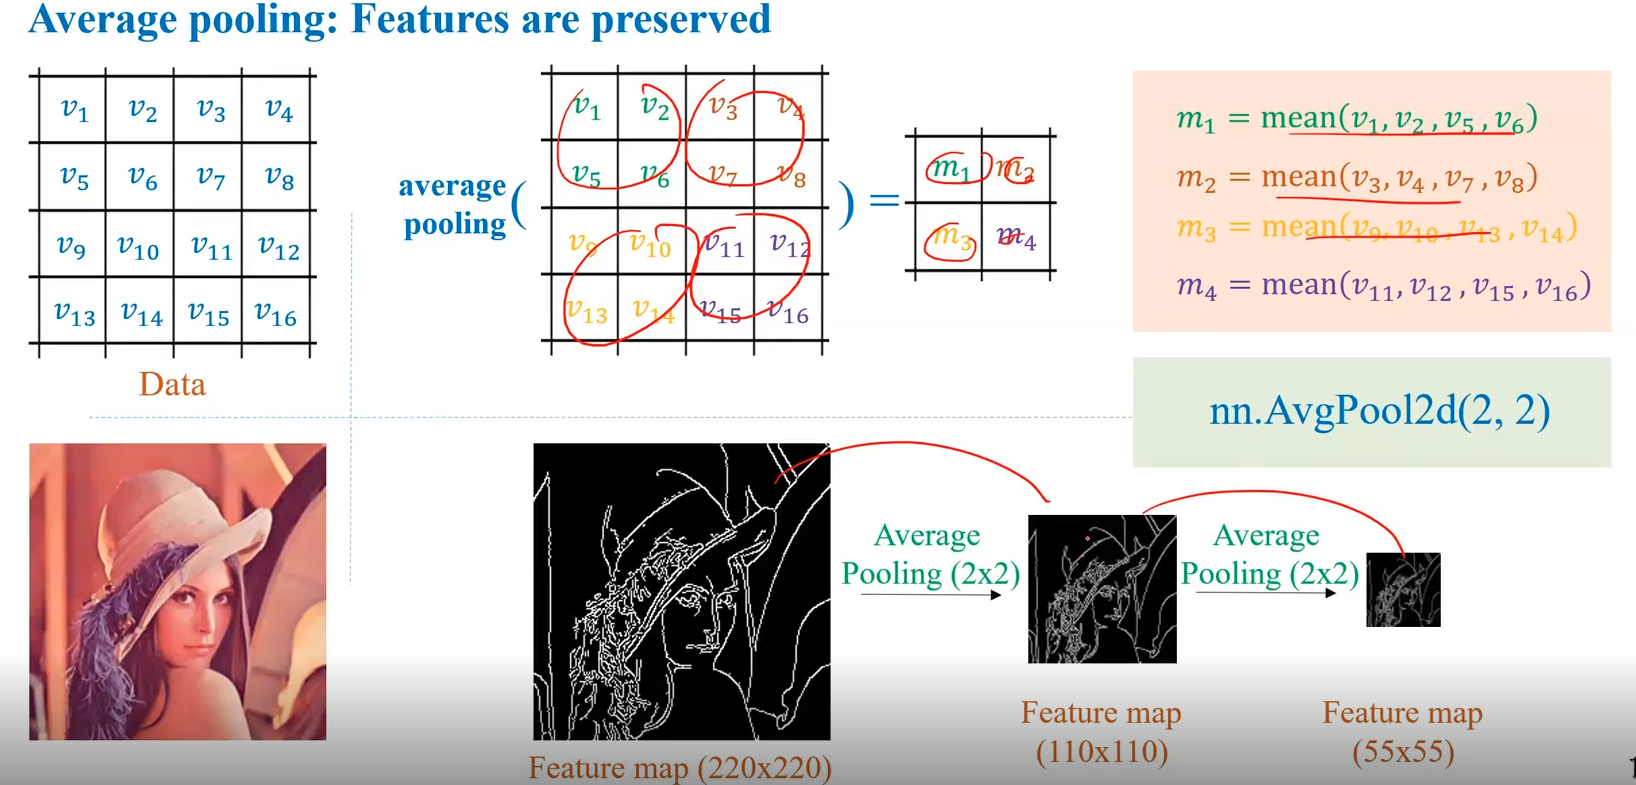

### 3. Padding

- padding remain shape for using more layer than 

### 4. 1x1 Convolution

### 5. LeNet and VGG Models